In [2]:
train_cat_dir = "../input/dogs-cats-images/dataset/training_set/cats"
train_dog_dir = "../input/dogs-cats-images/dataset/training_set/dogs/"
validation_cat_dir = "../input/dogs-cats-images/dataset/test_set/cats/"
validation_dog_dir = "../input/dogs-cats-images/dataset/test_set//dogs/"

In [3]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory("../input/dogs-cats-images/dataset/training_set",
                                                    batch_size = 40,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

validation_generator =  test_datagen.flow_from_directory( "../input/dogs-cats-images/dataset/test_set/",
                                                          batch_size  = 40,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [7]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [8]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_steps=50,
                              verbose=2)

Epoch 1/100
100/100 - 49s - loss: 0.6999 - accuracy: 0.5100 - val_loss: 0.6895 - val_accuracy: 0.5115
Epoch 2/100
100/100 - 42s - loss: 0.7017 - accuracy: 0.5623 - val_loss: 0.6788 - val_accuracy: 0.5555
Epoch 3/100
100/100 - 41s - loss: 0.6913 - accuracy: 0.5810 - val_loss: 0.7621 - val_accuracy: 0.5210
Epoch 4/100
100/100 - 41s - loss: 0.6845 - accuracy: 0.6148 - val_loss: 0.6419 - val_accuracy: 0.6520
Epoch 5/100
100/100 - 39s - loss: 0.6425 - accuracy: 0.6417 - val_loss: 0.6193 - val_accuracy: 0.6765
Epoch 6/100
100/100 - 40s - loss: 0.6306 - accuracy: 0.6503 - val_loss: 0.6077 - val_accuracy: 0.6665
Epoch 7/100
100/100 - 40s - loss: 0.6328 - accuracy: 0.6490 - val_loss: 0.5825 - val_accuracy: 0.6905
Epoch 8/100
100/100 - 39s - loss: 0.6209 - accuracy: 0.6765 - val_loss: 0.6097 - val_accuracy: 0.6510
Epoch 9/100
100/100 - 40s - loss: 0.6115 - accuracy: 0.6658 - val_loss: 0.5541 - val_accuracy: 0.7315
Epoch 10/100
100/100 - 40s - loss: 0.5938 - accuracy: 0.6883 - val_loss: 0.5483 - 

Epoch 81/100
100/100 - 38s - loss: 0.3474 - accuracy: 0.8553 - val_loss: 0.3126 - val_accuracy: 0.8845
Epoch 82/100
100/100 - 37s - loss: 0.3505 - accuracy: 0.8505 - val_loss: 0.3083 - val_accuracy: 0.8740
Epoch 83/100
100/100 - 39s - loss: 0.3987 - accuracy: 0.8478 - val_loss: 0.2663 - val_accuracy: 0.8885
Epoch 84/100
100/100 - 38s - loss: 0.3493 - accuracy: 0.8500 - val_loss: 0.3213 - val_accuracy: 0.8790
Epoch 85/100
100/100 - 39s - loss: 0.3516 - accuracy: 0.8562 - val_loss: 0.2533 - val_accuracy: 0.8990
Epoch 86/100
100/100 - 39s - loss: 0.3438 - accuracy: 0.8530 - val_loss: 0.2970 - val_accuracy: 0.8945
Epoch 87/100
100/100 - 38s - loss: 0.3544 - accuracy: 0.8505 - val_loss: 0.3074 - val_accuracy: 0.9065
Epoch 88/100
100/100 - 39s - loss: 0.3621 - accuracy: 0.8487 - val_loss: 0.4455 - val_accuracy: 0.7925
Epoch 89/100
100/100 - 39s - loss: 0.3582 - accuracy: 0.8545 - val_loss: 0.2605 - val_accuracy: 0.9020
Epoch 90/100
100/100 - 38s - loss: 0.3692 - accuracy: 0.8470 - val_loss: 

Text(0.5, 1.0, 'Training and validation loss')

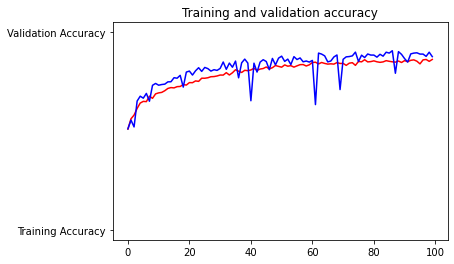

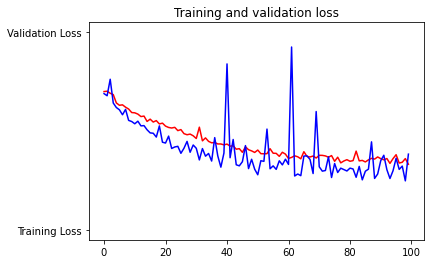

In [9]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 


plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()


plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')